In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_txt_file(file_path):
    file_name = os.path.basename(file_path)    
    frequency, amplitude, duration = file_name.split('_')[4:]
    df = pd.read_csv(file_path, sep='\t', header=None, names = ["Time", "Voltage", "Frequency", "FFT Voltage", "NaN"])
    df.name = f'data_{frequency}_{amplitude}_{duration}'
    return df

def extract_data_from_folder(folder_path):
    all_dataframes = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            df = read_txt_file(file_path)
            all_dataframes.append(df)

    return all_dataframes

data_folder_path = r"data"
dataframes_list = extract_data_from_folder(data_folder_path)

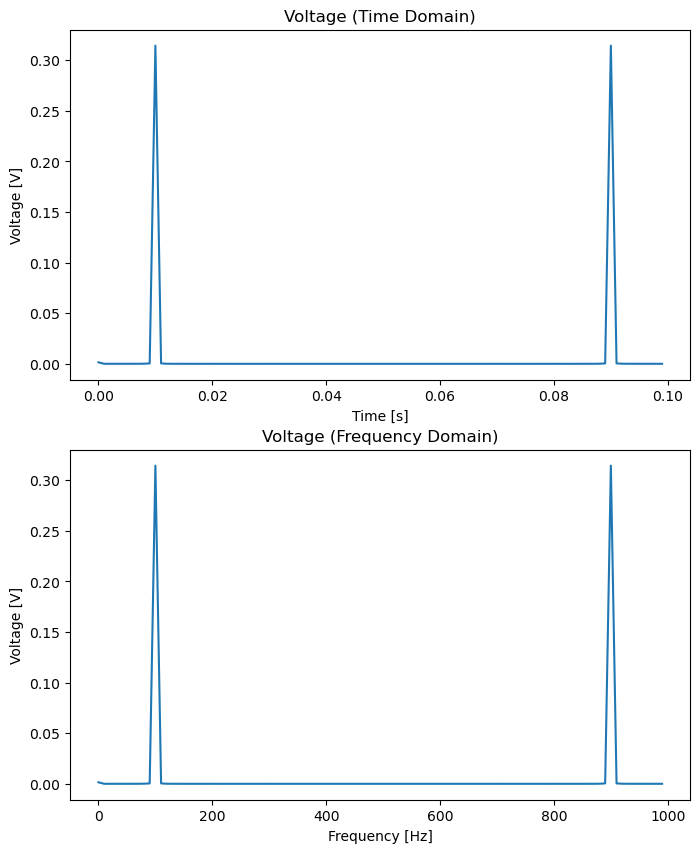

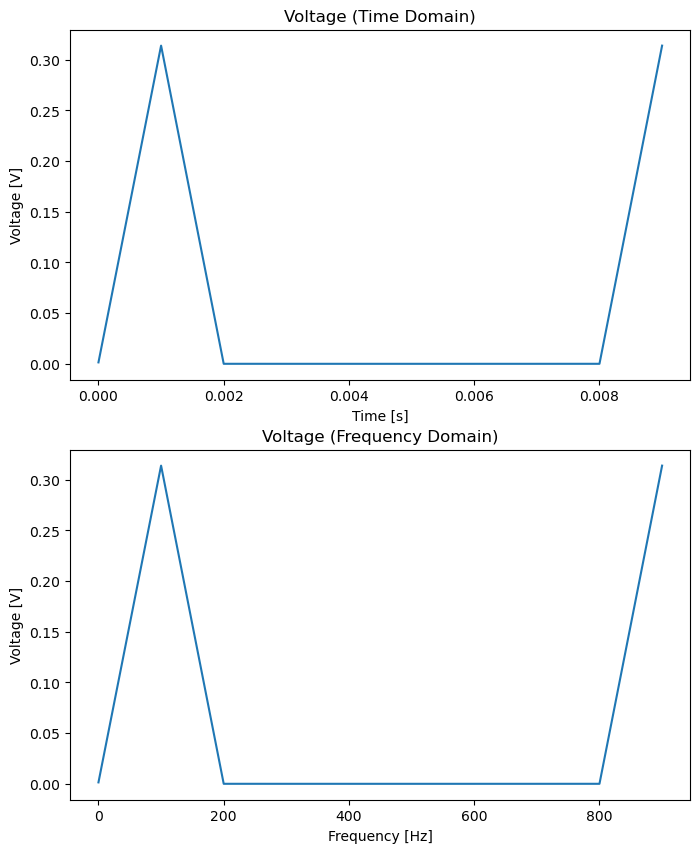

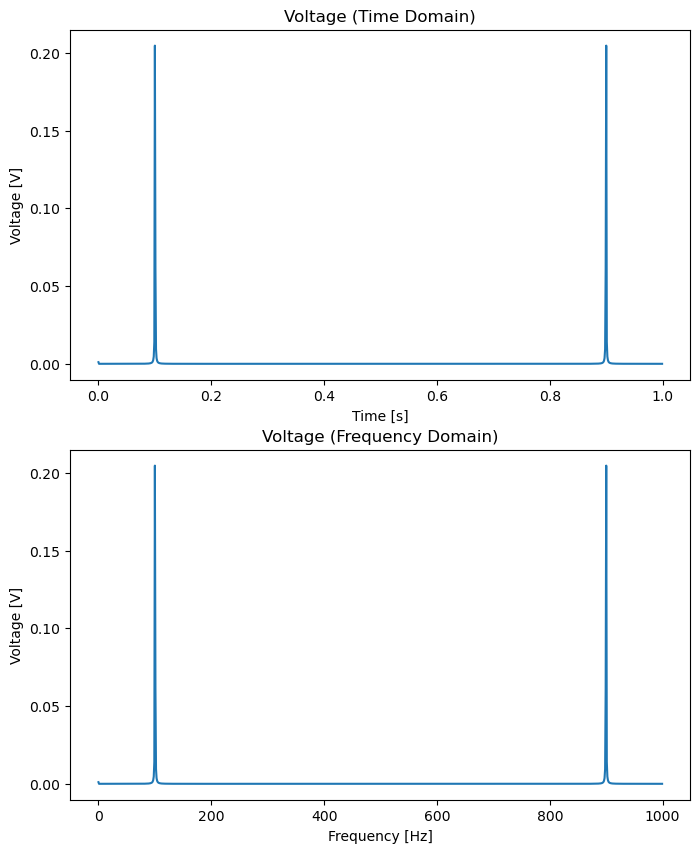

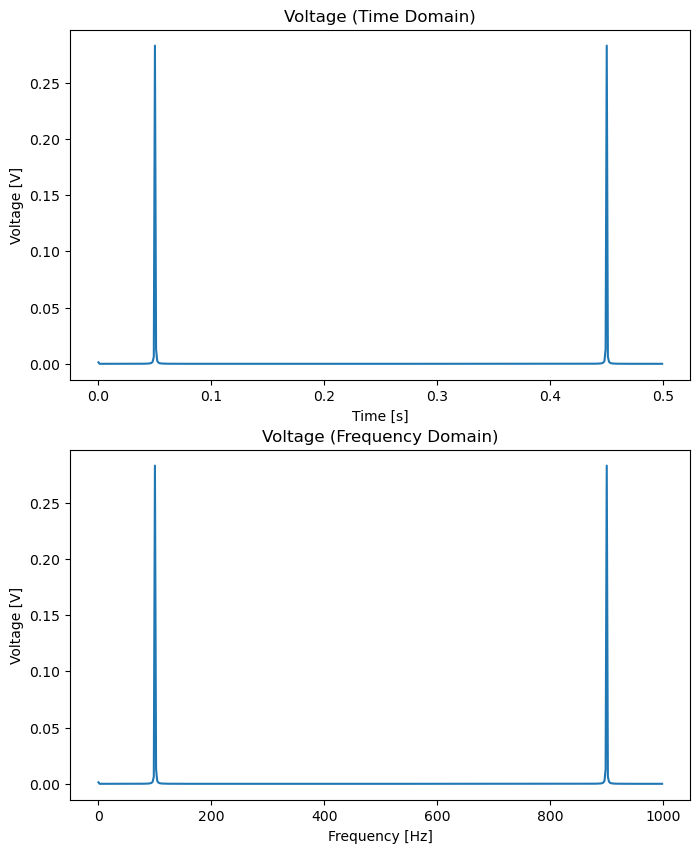

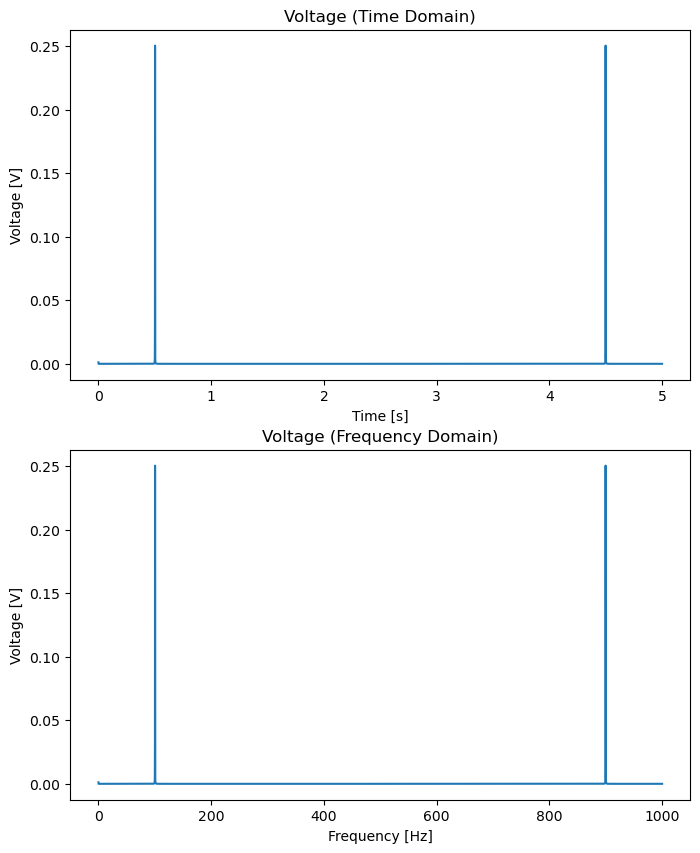

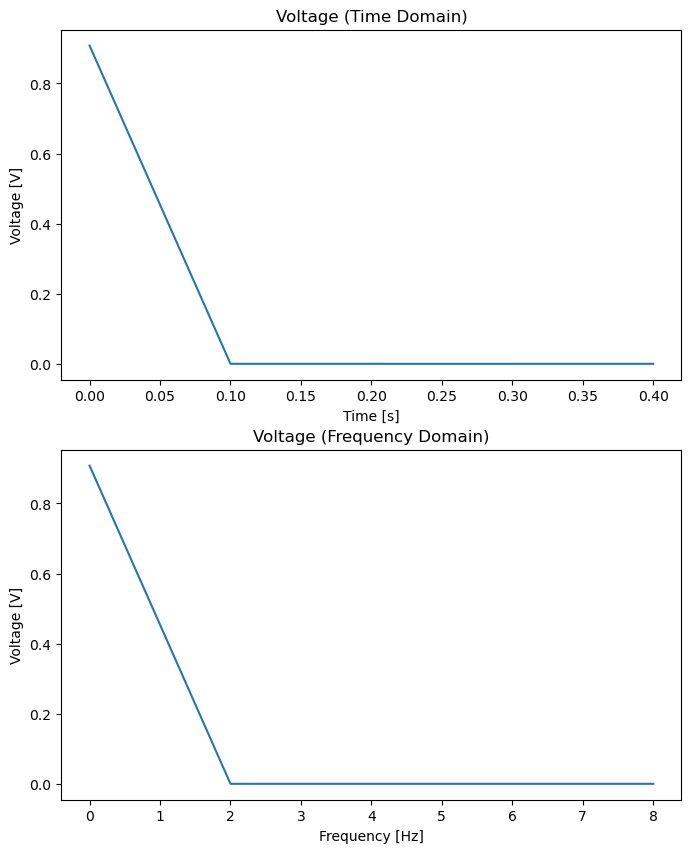

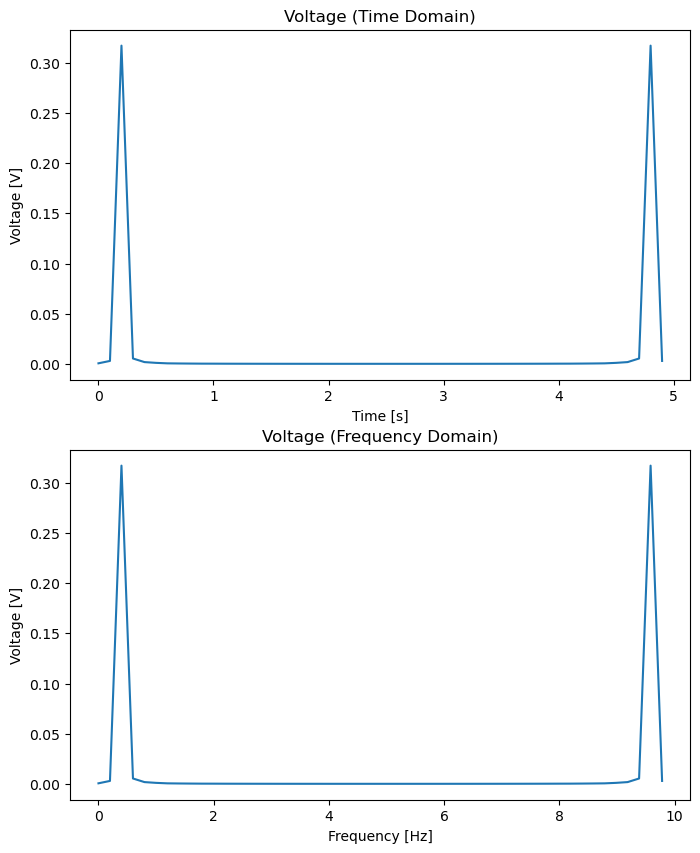

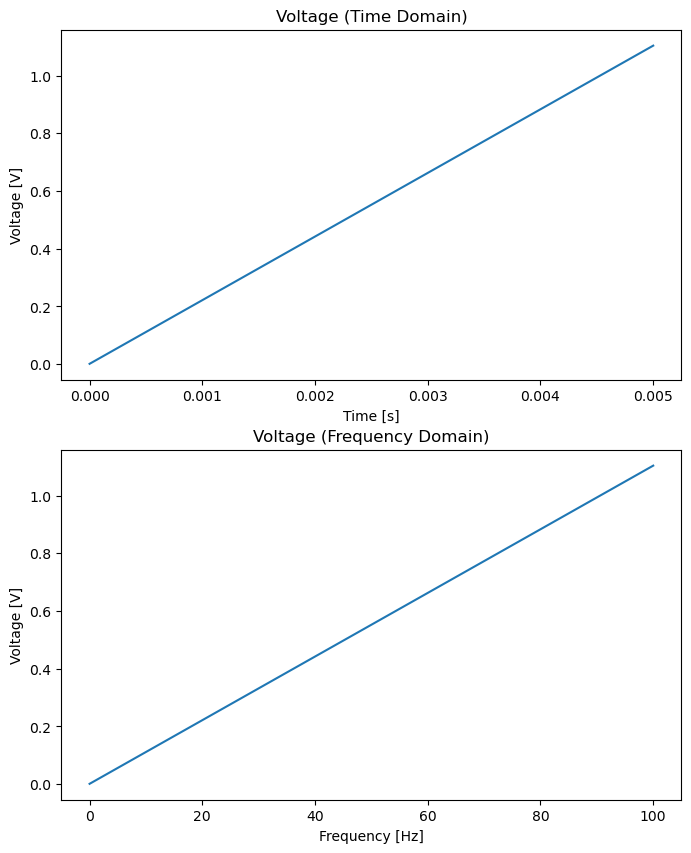

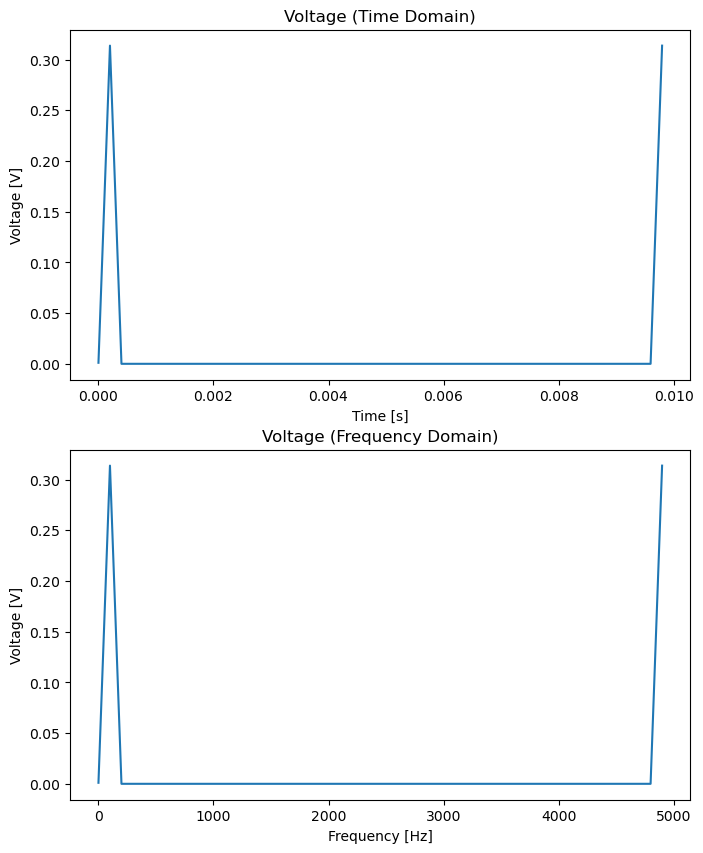

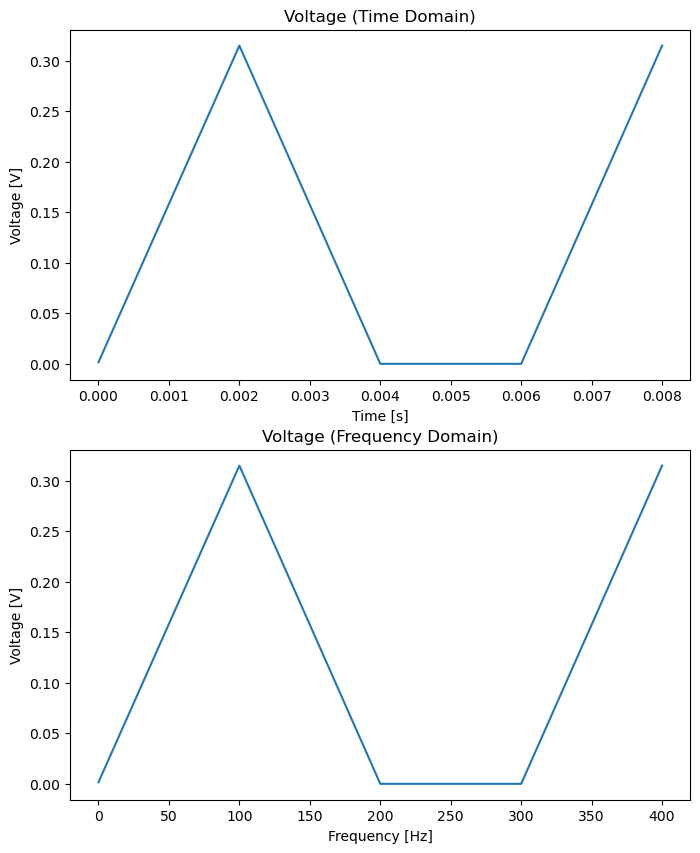

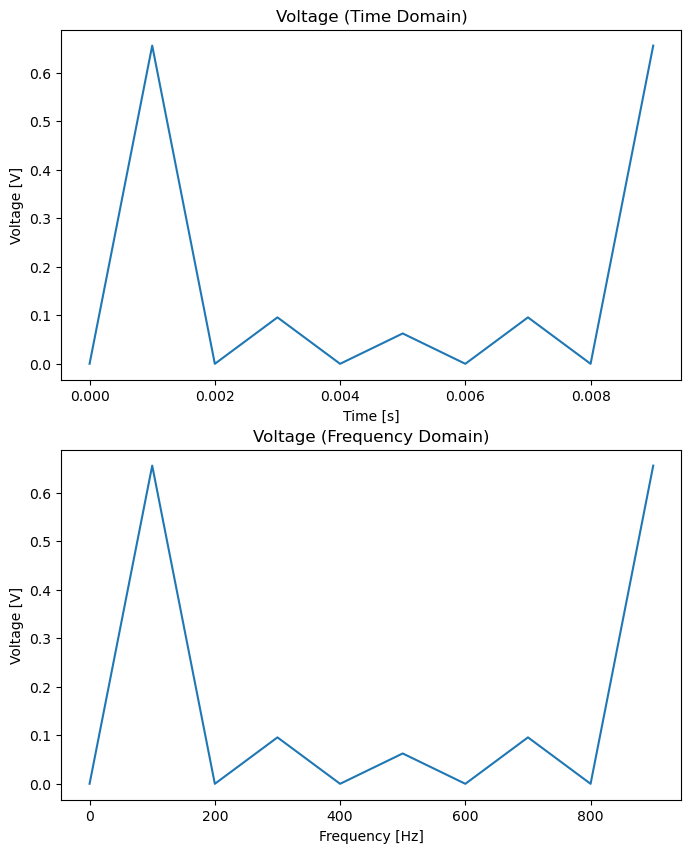

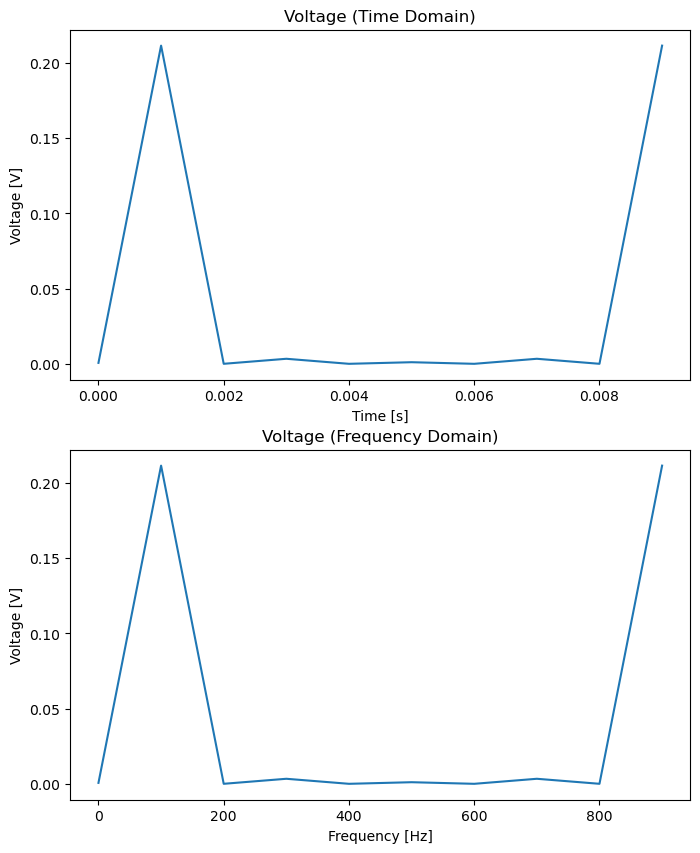

In [48]:
for i, df in enumerate(dataframes_list): 
    
    fig, (ax1,ax2) = plt.subplots(2,1,figsize = (8,10))
    ax1.plot(df["Time"], df["Voltage"])
    ax2.plot(df["Frequency"], df["FFT Voltage"])
    
    ax1.set_title("Voltage (Time Domain)")
    ax1.set_ylabel("Voltage [V]")
    ax1.set_xlabel("Time [s]")
    
    ax2.set_title("Voltage (Frequency Domain)")
    ax2.set_ylabel("Voltage [V]")
    ax2.set_xlabel("Frequency [Hz]")
    